In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
who_df = pd.read_csv('/Users/aleksandrakieler/Desktop/archive/Global COVID-19 Data (2020-2024)/Global COVID-19 Data (2020-2024)/WHO-COVID-19-global-data.csv', sep=';')

In [5]:
who_df.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,02/02/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


WHO-Regionen Data Cleaning

In [ ]:
# Nullwerte in der Spalte 'Country_code' fallen gelassen, weil sie 241 Nullwerte von 57840 Zeilen hat.
who_df = who_df.dropna(subset=['Country_code'])

# füllt jede unbekannte Region mit 'OTHER'
who_df['WHO_region'] =who_df['WHO_region'].fillna('OTHER')

In [7]:
who_df.isna().sum()

Date_reported            0
Country_code             0
Country                  0
WHO_region               0
New_cases            18769
Cumulative_cases         0
New_deaths           32723
Cumulative_deaths        0
dtype: int64

In [8]:
who_df.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,38830.0,1.997797e+04,2.714684e+05,-65079.0,43.0,394.5,4015.0,40475477.0
Cumulative_cases,57599.0,1.799611e+06,7.813230e+06,0.0,4115.5,45852.0,531723.5,103436829.0
New_deaths,24876.0,2.835775e+02,1.217300e+03,-3432.0,4.0,20.0,106.0,47687.0
Cumulative_deaths,57599.0,2.008246e+04,8.202777e+04,0.0,28.0,552.0,7118.0,1194158.0


In [9]:
# Checking for duplicates in the data
who_df.duplicated().sum()

0

In [ ]:
# Entfernen von Ausreißern aus den Spalten 'New_cases'
Q1 = who_df['New_cases'].quantile(0.25)
Q3 = who_df['New_cases'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
who_df = who_df[(who_df['New_cases'] >= min) & (who_df['New_cases'] <= max)]

In [ ]:
# Entfernen von Ausreißern aus den Spalten 'Cumulative_cases'
Q1 = who_df['Cumulative_cases'].quantile(0.25)
Q3 = who_df['Cumulative_cases'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
who_df = who_df[(who_df['Cumulative_cases'] >= min) & (who_df['Cumulative_cases'] <= max)]

In [ ]:
# Entfernen von Ausreißern aus den Spalten 'New_deaths'
Q1 = who_df['New_deaths'].quantile(0.25)
Q3 = who_df['New_deaths'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
who_df = who_df[(who_df['New_deaths'] >= min) & (who_df['New_deaths'] <= max)]

In [ ]:
# Entfernen von Ausreißern aus den Spalten 'Cumulative_deaths'
Q1 = who_df['Cumulative_deaths'].quantile(0.25)
Q3 = who_df['Cumulative_deaths'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
who_df = who_df[(who_df['Cumulative_deaths'] >= min) & (who_df['Cumulative_deaths'] <= max)]

In [35]:
who_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date_reported,6631,2021-05-01 04:24:56.244910336,2020-01-05 00:00:00,2020-08-30 00:00:00,2021-03-28 00:00:00,2021-11-21 00:00:00,2024-08-11 00:00:00,NaN
New_cases,6631.0,438.486955,0.0,81.0,240.0,602.0,2428.0,509.562223
Cumulative_cases,6631.0,21136.027447,1.0,3071.0,9822.0,25934.0,164325.0,28222.951102
New_deaths,6631.0,5.583622,0.0,1.0,3.0,7.0,28.0,6.189679
Cumulative_deaths,6631.0,271.941638,1.0,41.0,132.0,352.0,1418.0,334.331403


In [ ]:
# Änderung der negativen Werte in „New_cases“ und „New_dearhs“ in Nullen, da dies im Kontext der COVID-19-Daten keinen Sinn ergibt
who_df['New_cases'] = who_df['New_cases'].clip(lower=0)
who_df['New_deaths'] = who_df['New_deaths'].clip(lower=0)

In [37]:
who_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date_reported,6631,2021-05-01 04:24:56.244910336,2020-01-05 00:00:00,2020-08-30 00:00:00,2021-03-28 00:00:00,2021-11-21 00:00:00,2024-08-11 00:00:00,NaN
New_cases,6631.0,438.486955,0.0,81.0,240.0,602.0,2428.0,509.562223
Cumulative_cases,6631.0,21136.027447,1.0,3071.0,9822.0,25934.0,164325.0,28222.951102
New_deaths,6631.0,5.583622,0.0,1.0,3.0,7.0,28.0,6.189679
Cumulative_deaths,6631.0,271.941638,1.0,41.0,132.0,352.0,1418.0,334.331403


In [39]:
who_df.isna().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

WHO-Regionen Analysis

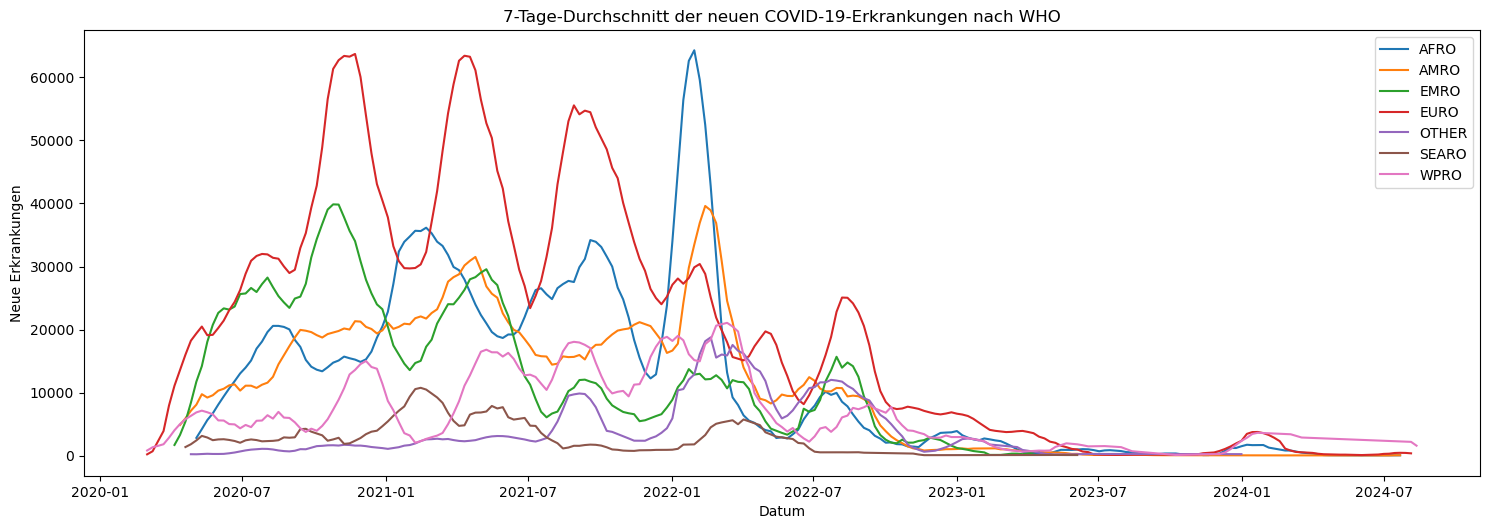

In [14]:
# Vergleich des Verlaufs der Pandemie in verschiedenen geografischen Gebieten

def analyze_pandemic_progression(who_df):
    # Die Daten vorverarbeiten
    # Bei der Konvertierung von Daten ist das Format explizit anzugeben.
    who_df['Date_reported'] = pd.to_datetime(who_df['Date_reported'], format='%d/%m/%Y')
    
    # Gruppendaten nach WHO-Region und Datum
    regional_progression = who_df.groupby(['WHO_region', 'Date_reported']).agg({
        'New_cases': 'sum',
        'New_deaths': 'sum',
        'Cumulative_cases': 'sum',
        'Cumulative_deaths': 'sum'
    }).reset_index()
    
    # Berechnung von gleitenden 7-Tage-Durchschnitten für eine gleichmäßigere Trenddarstellung
    regional_progression['Rolling_New_Cases'] = regional_progression.groupby('WHO_region')['New_cases'].rolling(window=7).mean().reset_index(0, drop=True)
    regional_progression['Rolling_New_Deaths'] = regional_progression.groupby('WHO_region')['New_deaths'].rolling(window=7).mean().reset_index(0, drop=True)
    
    # Visualisierung der regionalen Progression
    plt.figure(figsize=(15, 10))
    
    # New Cases Subplot
    plt.subplot(2, 1, 1)
    for region in regional_progression['WHO_region'].unique():
        region_data = regional_progression[regional_progression['WHO_region'] == region]
        plt.plot(region_data['Date_reported'], region_data['Rolling_New_Cases'], label=region)
    plt.title('7-Tage-Durchschnitt der neuen COVID-19-Erkrankungen nach WHO')
    plt.xlabel('Datum')
    plt.ylabel('Neue Erkrankungen')
    plt.legend()

    plt.tight_layout()
    plt.show()
analyze_pandemic_progression(who_df)